<a href="https://colab.research.google.com/github/zhousanfu/machine-learning-demo/blob/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 模型定义

优化器（optimizer）：基于训练数据和损失函数来更新网络的机制。

损失函数（loss function）：网络如何衡量在训练数据上的性能，即网络如何朝着正确的方向前进。

在训练和测试过程中需要监控的指标（metric）：本例只关心精度，即正确分类的图像所占的比例。


 2 个 Dense 层，密集连接（也叫全连接）的神经层。
 
 第二层（也是最后一层）是一个 10 路 softmax 层，它将返回一个由 10 个概率值（总和为 1）组成的数组

优化器（optimizer）：基于训练数据和损失函数来更新网络的机制。

损失函数（loss function）：网络如何衡量在训练数据上的性能，即网络如何朝着正确的方向前进。

在训练和测试过程中需要监控的指标（metric）：本例只关心精度，即正确分类的图像所占的比例。



```
tf.keras.layers.Dense(
    units,                                 # 正整数，输出空间的维数
    activation=None,                       # 激活函数，不指定则没有 ('relu','sigmoid','LeakyReLU')
    use_bias=True,						   # 布尔值，是否使用偏移向量
    kernel_initializer='glorot_uniform',   # 核权重矩阵的初始值设定项
    bias_initializer='zeros',              # 偏差向量的初始值设定项
    kernel_regularizer=None,               # 正则化函数应用于核权矩阵
    bias_regularizer=None,                 # 应用于偏差向量的正则化函数
    activity_regularizer=None,             # Regularizer function applied to the output of the layer (its "activation")
    kernel_constraint=None,                # Constraint function applied to the kernel weights matrix.
    bias_constraint=None, **kwargs         # Constraint function applied to the bias vector
    )

model.compile(
    optimizer = tf.keras.optimizers.优化器(参数)，
    # “sgd” 或者 tf.optimizers.SGD(lr = 学习率， decay = 学习率衰减率，momentum = 动量参数）
    # “adagrad" 或者 tf.keras.optimizers.Adagrad(lr = 学习率， decay = 学习率衰减率）
    # ”adadelta" 或者 tf.keras.optimizers.Adadelta(lr = 学习率，decay = 学习率衰减率）
    # “adam" 或者 tf.keras.optimizers.Adam(lr = 学习率， decay = 学习率衰减率）
    
    loss = tf.keras.losses.损失函数(参数)，
    # ”mse" 或者 tf.keras.losses.MeanSquaredError()
    # "sparse_categorical_crossentropy" 或tf.keras.losses.SparseCatagoricalCrossentropy(from_logits = False)
    
    metrics = ["sparse_accuracy"]
    # "accuracy" : y_ture 和 y_pred 都是数值，如y_ = [1] y = [1] #y_为真实值，y为预测值
    # “sparse_accuracy":y_和y都是以独热码 和 概率分布表示，如y_ture = [0, 1, 0], y_pred = [0.256,
    # 0.695, 0.048]
    # "sparse_categorical_accuracy" :检查 y_true 中的值（本身就是index） 与 y_pred 中最大值对应的index是否相等。 y_true是以数值形式给出， y_pred是以独热码给出，如y_ = [1], y = [0.256 0.695, 0.048]
    )
```

In [ ]:
import tensorflow as tf
print('tensorflow version {}'.format(tf.__version__))

import numpy as np
import pandas as pd
import seaborn as sns                   # seaborn 绘制矩阵图 (pairplot)
import warnings                         # 忽略普通警告，不打印太多东西
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 20
# 把图轻松的镶嵌到这个notebook中
%matplotlib inline

## 数据转化

In [ ]:
def sigmoid(X,useStatus):
    if useStatus:
        return 1.0 / (1 + np.exp(-float(X)));
    else:
        return float(X);



## 线性回归


In [ ]:
from tensorflow import losses
from tensorflow import initializers as init

# 创建tf.keras模型
model = tf.keras.Sequential() #顺序处理模型
# kernel_initializer=init.RandomNormal(stddev=0.01))
model.add(tf.keras.layers.Dense(1,input_shape=(1,),activation='LeakyReLU')) # 添加一个层 ，此处加一个Dense层
model.summary() #显示model的Dense的形状

# 编译模型
model.complie(
    optimizer = 'adma',
    loss = 'mse'  #  "sparse_categorical_crossentropy"
)
# 模型已经编译好了，可以进行训练了
history = model.fit(x, y, epochs=10)


from tensorflow import data as tfdata
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import initializers as init
from tensorflow import losses
from tensorflow.keras import optimizers

# 设置网络结构：1 层全连接，初始化模型参数
model = keras.Sequential()
model.add(layers.Dense(1, kernel_initializer=init.RandomNormal(stddev=0.01)))

# loss 函数：MSE
loss = losses.MeanSquaredError()

# 优化策略：随机梯度下降
trainer = optimizers.SGD(learning_rate=0.03)

# 设置数据集，和小批量的样本数
batch_size = 10
dataset = tfdata.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(len(features)).batch(batch_size)

num_epochs = 3
for epoch in range(1, num_epochs+1):
    # 取小批量进行计算
    for (batch, (X, y)) in enumerate(dataset):
        with tf.GradientTape() as tape:
            # 计算 loss
            l = loss(model(X, training=True), y)
        # 计算梯度并更新参数
        grads = tape.gradient(l, model.trainable_variables)
        trainer.apply_gradients(zip(grads, model.trainable_variables))
    
    # 本次迭代后的总 loss
    l = loss(model(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.numpy().mean()))
# 输出模型参数
print(model.get_weights())


## 逻辑回归（Logistic Regression）

### 函数

分类问题。我们要训练一个最简单的Logistic Regression

z
(
x
)
=
w
∗
x
+
b
 ， 
a
(
z
)
=
σ
(
z
)
=
1
1
+
e
−
z
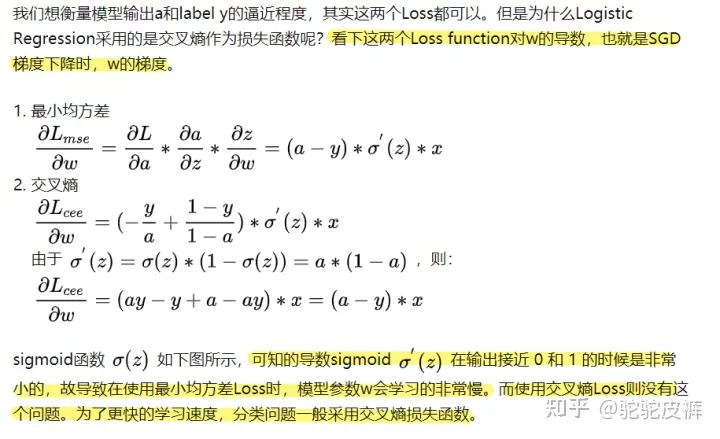



### 信用卡欺诈检测

基于信用卡交易记录数据，建立分类模型来预测哪些交易记录是异常的，哪些是正常的。


#### 数据处理

In [ ]:
!cp '/content/drive/MyDrive/Data/学习demo/creditcard.csv' 'creditcard.csv'
data = pd.read_csv('creditcard.csv')
data.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

# X = (x-μ)/σ,使得新的X数据集方差为1，均值为0
# fit_transform(data['Amount']) 意思是找出data['Amount']的μ和σ，并应用在data['Amount']上。
data['V29'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time', 'Amount'], axis=1)  # Time这里用不上也去掉
data.head()

In [ ]:
from sklearn.model_selection import train_test_split  # 切分数据集

X = data.loc[:,data.columns != "Class"]  # 特征
y = data.loc[:,data.columns == "Class"]  # 标签
 
# 得到正样本（异常样本）的索引
number_records_fraud=len(data[data.Class==1])
fraud_indices=np.array(data[data.Class==1].index)

# 得到负样本（正常样本）的索引
normal_indices=data[data.Class==0].index
 
# 从正常样本中随机采样指定个数的样本，并取索引
random_normal_indices=np.random.choice(normal_indices, number_records_fraud,replace=False) 
random_normal_indices=np.array(random_normal_indices)

# 有了正常样本和异常样本的索引
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])

# 根据索引得到下采样的所有样本点
under_sample_data=data.iloc[under_sample_indices,:]

X_under_sample=under_sample_data.iloc[:,under_sample_data.columns != "Class"]
Y_under_sample=under_sample_data.iloc[:,under_sample_data.columns == "Class"]

print("正常样本所占整体比例：", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("异常样本所占整体比例：", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("下采样策略总体样本量：", len(under_sample_data))

# 将数据切割成训练集0.7 和测试集 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("原始训练集包含样本量：", len(X_train))
print("原始测试集包含样本量：", len(X_test))
print("原始样本总数：", len(X_train)+len(X_test))

# 下采样数据集进行划分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_under_sample
                                                                                                   ,Y_under_sample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
 
print("\n")
print("下采样训练集包含样本数量: ", len(X_train_undersample))
print("下采样测试集包含样本数量: ", len(X_test_undersample))
print("下采样样本总数: ", len(X_train_undersample)+len(X_test_undersample))

#### 模型训练

In [ ]:
def logistic_regression_model(hidden_dim, epochs, X_train, Y_train, regularizer=None, dropout=0):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    # activation(激活函数): 逻辑回归-sigmoid
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_dim, activation='relu', kernel_regularizer=regularizer, input_shape=(len(X_train.keys()),)),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])
    
    # loss(损失函数): 逻辑回归-交叉熵损失函数-二值交叉熵binary_crossentropy，
    # metrics = ['acc'显示正确率, 'mae', 'mse', ]
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['acc']
        )
    
    history = model.fit(
        X_train,
        Y_train,
        epochs=epochs,
        validation_split=0.2,
        verbose=0,
        callbacks=[early_stop, ProgressBar()]
        )
    
    model.save('my_model.h5')
    # models.load_model('my_model.h5')

    # print(model.summary())
    return history, model


class ProgressBar(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # 显示进度条
        self.draw_progress_bar(epoch + 1, 1000)

    def draw_progress_bar(self, cur, total, bar_len=50):
        import sys
        cur_len = int(cur / total * bar_len)
        sys.stdout.write("\r")
        sys.stdout.write("[{:<{}}] {}/{}".format("=" * cur_len, bar_len, cur, total))
        sys.stdout.flush()


def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='train')
    plt.plot(hist['epoch'], hist['val_loss'], label='valu')
    # plt.ylim([0, 20])
    plt.legend()
  
    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel('ACC')
    plt.plot(hist['epoch'], hist['acc'], label='train')
    plt.plot(hist['epoch'], hist['val_acc'], label='valu')
    # plt.ylim([0, 5])
    plt.legend()


historys = []
for i in range(40, 42, 1):
    history,model = logistic_regression_model(
        hidden_dim = i,
        epochs = 1000,
        regularizer = tf.keras.regularizers.l2(0.001),
        dropout = 0.2,
        X_train=X_train_undersample,
        Y_train=y_train_undersample
        )
    historys.append(('参数-'+str(i), history))
historys

#### 训练结果

In [ ]:
def plot_history(histories, key=None):
    plt.figure(figsize=(32, 12))

    names = []
    for name, history in histories:
        names = [i for i in history.history.keys() if 'val' not in i]
    
    for name, history in histories:
        for i in names:
            if key != None and key in i:
                val = plt.plot(history.epoch, history.history[i], '--', label = name+'train')
                plt.plot(history.epoch, history.history['val_'+i], color=val[0].get_color(), label = name+'val')
            if key == None:
                val = plt.plot(history.epoch, history.history[i], '--', label = name+'train')
                plt.plot(history.epoch, history.history['val_'+i], color=val[0].get_color(), label = name+'val')

    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend()
    plt.xlim([0, max(history.epoch)])

plot_history(historys, key='acc')
plot_history(historys, key='loss')

In [ ]:
history,model = logistic_regression_model(
        hidden_dim = 42,
        epochs = 1000,
        regularizer = tf.keras.regularizers.l2(0.001),
        dropout = 0.2,
        X_train=X_train_undersample,
        Y_train=y_train_undersample
        )
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

#### 泛化模型

In [ ]:
loss, acc = model.evaluate(X_test_undersample, y_test_undersample, verbose=2)

In [ ]:
test_pred = model.predict(X_test_undersample).flatten()
plt.scatter(y_test_undersample, test_pred)
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])

#### 模型预测

In [ ]:
print(y_test_undersample[:10])
example_batch = X_test_undersample[:10]
example_result = model.predict(example_batch)
example_result

# example_result = model.predict_classes(example_batch)
# example_result

In [ ]:
test_pred = model.predict(X_test_undersample)
error = test_pred - y_test_undersample
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

### MNIST手写数字

In [ ]:
# MNIST 数据集参数
num_classes = 10 # 数字0-9
num_features = 784 # 28*28

# 训练参数
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

In [ ]:
# 准备MNIST数据
from tensorflow.keras.datasets import mnist

(x_train, y_train),(x_test,y_test) = mnist.load_data()
# 转换为float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# 将图像平铺成784个特征的一维向量(28*28)
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# 将像素值从[0,255]归一化为[0,1]
x_train,x_test = x_train / 255, x_test / 255

# 使用tf.data api 对数据随机分布和批处理
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)
# 之前通过load_data()准备好要加载的数据集，使用 from_tensor_slices()行加载；
# 使用repeat()设置循环迭代，repeat参数给定一个整型值就可以使数据重复几份（几个epoch）； 1个epoch等于使用训练集中的全部样本训练一次；
# 使用shuffle()打乱，shuffle是防止数据过拟合的重要手段（固定的数据集顺序，严重限制了梯度优化方向的可选择性，导致收敛点选择空间严重变少，容易导致过拟合）参数为buffer_size；buffer_size的作用就是存放数据集中部分数据的缓冲区大小，每次取数据是从缓冲区中随机取出一个item，该item是一个batch，取出后再拿数据集中未在缓冲区出现过的数据（依次）去填充该缓冲区的空缺位置；
# 使用batch()批处理，按照batch_size切割数据打包；
# prefetch()：提前从数据集中取出若干数据放到内存中，cpu通过处理数据，在处理当前元素时准备以后的元素，减少 GPU 的闲置时间，从而提高训练的速度；Buffer_size 是 GPU 预读取的批次数量。通常 buffer_size=1 在多数情况下就足够了，特别是每批次的处理时间不断变化时，这样设置能协调时间。

# 权值矩阵形状[784,10]，28 * 28图像特征数和类别数目
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
# 偏置形状[10], 类别数目
b = tf.Variable(tf.zeros([num_classes]), name="bias")


In [ ]:
# 逻辑斯谛回归（Wx+b)
def logistic_regression(x):
    #应用softmax将logits标准化为概率分布
    return tf.nn.softmax(tf.matmul(x,W) + b)

# 交叉熵损失函数
def cross_entropy(y_pred, y_true):
    # 将标签编码为一个独热编码向量
    y_true = tf.one_hot(y_true, depth=num_classes)
    # 压缩预测值以避免log（0）错误
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # 计算交叉熵
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# 准确率度量
def accuracy(y_pred, y_true):
    # 预测的类别是预测向量中最高分的索引（即argmax）
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 随机梯度下降优化器
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
# 优化过程
def run_optimization(x, y):
    #将计算封装在GradientTape中以实现自动微分
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    # 计算梯度
    gradients = g.gradient(loss, [W, b])

    # 根据gradients更新 W 和 b
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
# 针对给定训练步骤数开始训练
for step, (batch_x,batch_y) in enumerate(train_data.take(training_steps), 1):
    # 运行优化以更新W和b值
    run_optimization(batch_x, batch_y)

    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

In [ ]:
# 可视化预测
import matplotlib.pyplot as plt

# 在验证集上中预测5张图片
n_images = 5
test_images = x_test[:n_images]
predictions = logistic_regression(test_images)

# 可视化图片和模型预测结果
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i],[28,28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

## 模型保存

In [ ]:
# 保存模型结构及权重

model.save('/home/kesci/input/data3483/data/keras_model_weight.h5')  

del model  #删除现有模型

# identical to the previous one
model = models.load_model('/home/kesci/input/data3483/data/keras_model_weight.h5')
model.evaluate(x_test,y_test)
# 保存模型结构
json_str = model.to_json()

# 恢复模型结构
model_json = models.model_from_json(json_str)

#保存模型权重
model.save_weights('/home/kesci/input/data3483/data/keras_model_weight.h5')

# 恢复模型结构
model_json = models.model_from_json(json_str)
model_json.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['AUC']
    )

# 加载权重
model_json.load_weights('/home/kesci/input/data3483/data/keras_model_weight.h5')
model_json.evaluate(x_test,y_test)

# TensorFlow原生方式保存
# 保存权重，该方式仅仅保存权重张量
model.save_weights('/home/kesci/input/data3483/data/tf_model_weights.ckpt',save_format = "tf")
# 保存模型结构与模型参数到文件,该方式保存的模型具有跨平台性便于部署

model.save('/home/kesci/input/data3483/data/tf_model_savedmodel', save_format="tf")
print('export saved model.')

model_loaded = tf.keras.models.load_model('/home/kesci/input/data3483/data/tf_model_savedmodel')
model_loaded.evaluate(x_test,y_test)

## NLP

### 文本预处理
tf.data.Dataset搭配.keras.layers.experimental.preprocessing.TextVectorization预处理层

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/Data/和鲸社区tensorflow_data.zip 和鲸社区tensorflow_data.zip
!unzip 和鲸社区tensorflow_data.zip

In [ ]:
import numpy as np 
import pandas as pd
import re,string
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers,preprocessing,optimizers,losses,metrics
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

train_data_path = "/content/data/imdb/train.csv"
test_data_path =  "/content/data/imdb/test.csv"

MAX_WORDS = 10000  # 仅考虑最高频的10000个词
MAX_LEN = 200  # 每个样本保留200个词的长度
BATCH_SIZE = 20

In [ ]:
#构建管道
def split_line(line):
    arr = tf.strings.split(line, "\t")
    label = tf.expand_dims(tf.cast(tf.strings.to_number(arr[0]),tf.int32),axis = 0)
    text = tf.expand_dims(arr[1],axis = 0)
    return (text,label)

ds_train_raw =  tf.data.TextLineDataset(filenames = [train_data_path]) \
   .map(split_line, num_parallel_calls = tf.data.experimental.AUTOTUNE) \
   .shuffle(buffer_size = 1000).batch(BATCH_SIZE) \
   .prefetch(tf.data.experimental.AUTOTUNE)

ds_test_raw = tf.data.TextLineDataset(filenames = [test_data_path]) \
   .map(split_line,num_parallel_calls = tf.data.experimental.AUTOTUNE) \
   .batch(BATCH_SIZE) \
   .prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
#构建词典
def clean_text(text):
    lowercase = tf.strings.lower(text)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    cleaned_punctuation = tf.strings.regex_replace(stripped_html, '[%s]' % re.escape(string.punctuation),'')
    return cleaned_punctuation

vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    standardize = clean_text,
    split = 'whitespace',
    max_tokens = MAX_WORDS-1, #有一个留给占位符
    output_mode = 'int',
    output_sequence_length = MAX_LEN)

ds_text = ds_train_raw.map(lambda text, label: text)
vectorize_layer.adapt(ds_text)
print(vectorize_layer.get_vocabulary()[0:100])

In [ ]:
#单词编码
ds_train = ds_train_raw.map(lambda text,label:(vectorize_layer(text),label)).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test_raw.map(lambda text,label:(vectorize_layer(text),label)).prefetch(tf.data.experimental.AUTOTUNE)
ds_test

In [ ]:
tf.keras.backend.clear_session()

class CnnModel(models.Model):
    def __init__(self):
        super(CnnModel, self).__init__()
        
    def build(self,input_shape):
        self.embedding = layers.Embedding(MAX_WORDS,7,input_length=MAX_LEN)
        self.conv_1 = layers.Conv1D(16, kernel_size= 5,name = "conv_1",activation = "relu")
        self.pool = layers.MaxPool1D()
        self.conv_2 = layers.Conv1D(128, kernel_size=2,name = "conv_2",activation = "relu")
        self.flatten = layers.Flatten()
        self.dense = layers.Dense(1,activation = "sigmoid")
        super(CnnModel,self).build(input_shape)
    
    def call(self, x):
        x = self.embedding(x)
        x = self.conv_1(x)
        x = self.pool(x)
        x = self.conv_2(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.dense(x)
        return(x)
    
model = CnnModel()
model.build(input_shape=(None,MAX_LEN))
model.summary()

In [ ]:
# 训练模型
@tf.function
def printbar():
    
    today_ts = tf.timestamp()%(24*60*60)

    hour = tf.cast(today_ts//3600+8,tf.int32)%tf.constant(24)
    minite = tf.cast((today_ts%3600)//60,tf.int32)
    second = tf.cast(tf.floor(today_ts%60),tf.int32)
    
    def timeformat(m):
        if tf.strings.length(tf.strings.format("{}",m))==1:
            return(tf.strings.format("0{}",m))
        else:
            return(tf.strings.format("{}",m))
    
    timestring = tf.strings.join([timeformat(hour),timeformat(minite),
                timeformat(second)],separator = ":")
    tf.print("=========="*8+timestring)

@tf.function
def train_step(model, features, labels):
    with tf.GradientTape() as tape:
        predictions = model(features,training = True)
        loss = loss_func(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss.update_state(loss)
    train_metric.update_state(labels, predictions)
    
@tf.function
def valid_step(model, features, labels):
    predictions = model(features,training = False)
    batch_loss = loss_func(labels, predictions)
    valid_loss.update_state(batch_loss)
    valid_metric.update_state(labels, predictions)

def train_model(model,ds_train,ds_valid,epochs):
    for epoch in tf.range(1, epochs+1):
        
        for features, labels in ds_train:
            train_step(model,features,labels)

        for features, labels in ds_valid:
            valid_step(model,features,labels)
        
        #此处logs模板需要根据metric具体情况修改
        logs = 'Epoch={},Loss:{},Accuracy:{},Valid Loss:{},Valid Accuracy:{}' 
        
        if epoch%1==0:
            printbar()
            tf.print(tf.strings.format(logs,
            (epoch,train_loss.result(),train_metric.result(),valid_loss.result(),valid_metric.result())))
            tf.print("")
        
        train_loss.reset_states()
        valid_loss.reset_states()
        train_metric.reset_states()
        valid_metric.reset_states()

optimizer = optimizers.Nadam()
loss_func = losses.BinaryCrossentropy()

train_loss = metrics.Mean(name='train_loss')
train_metric = metrics.BinaryAccuracy(name='train_accuracy')

valid_loss = metrics.Mean(name='valid_loss')
valid_metric = metrics.BinaryAccuracy(name='valid_accuracy')

train_model(model,ds_train,ds_test,epochs = 6)

In [ ]:
# 评估模型
def evaluate_model(model,ds_valid):
    for features, labels in ds_valid:
         valid_step(model,features,labels)
    logs = 'Valid Loss:{},Valid Accuracy:{}' 
    tf.print(tf.strings.format(logs,(valid_loss.result(),valid_metric.result())))
    
    valid_loss.reset_states()
    train_metric.reset_states()
    valid_metric.reset_states()

evaluate_model(model,ds_test)

In [ ]:
model.save('tf_model_savedmodel', save_format="tf")
print('export saved model.')
model_loaded = tf.keras.models.load_model('tf_model_savedmodel')
model_loaded.predict(ds_test)

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Data/复旦大学中文文本分类语料.xlsx', 'sheet1')
data

,分类,正文
0,艺术,﻿【 文献号 】1-2432\n【原文出处】出版发行研究\n【原刊地名】京\n【原刊期号】1...
1,艺术,﻿【 文献号 】1-2435\n【原文出处】扬州师院学报：社科版\n【原刊期号】199504...
2,艺术,﻿【 文献号 】1-2785\n【原文出处】南通师专学报：社科版\n【原刊期号】199503...
3,艺术,﻿【 文献号 】1-3021\n【原文出处】社会科学战线\n【原刊地名】长春\n【原刊期号】...
4,艺术,﻿【 文献号 】1-3062\n【原文出处】上海文化\n【原刊期号】199505\n【原刊页...
...,...,...
9244,法律,﻿２１５\n 企业 管理 体制 与 生产 经营 \n０６０１\n１９８７ 年 ３月 ２４...
9245,法律,﻿２１７\n 企业 管理 体制 与 生产 经营 \n０６０１\n１９８５ 年 ９月 ３０...
9246,法律,﻿２２６\n 企业 管理 体制 与 生产 经营 \n０６０１\n１９８４ 年 ５月 ２６...
9247,法律,﻿２３１\n 企业 管理 体制 与 生产 经营 \n０６０１\n１９８８ 年 ４月 ...


### 词向量

Skip-Gram方法(训练word2vec词向量)
​ 以某个词为中心，分别计算该中心词前后可能出现其他词的各个概率，即给定input word来预测上下文。

CBOW（Continous Bags Of Words，CBOW）
​ CBOW根据某个词前面的n个词、或者前后各n个连续的词，来计算某个词出现的概率，即给定上下文，来预测input word。相比Skip-Gram，CBOW更快一些。

In [ ]:
import gensim
import jieba
import numpy as np 
import pandas as pd
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential
# from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
# from keras.layers.embeddings import Embedding
# from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize

data = pd.read_excel('/content/drive/MyDrive/Data/复旦大学中文文本分类语料.xlsx', 'sheet1')
jieba.enable_parallel(64) #并行分词开启
data['文本分词'] = data['正文'].apply(lambda i:jieba.cut(i))
data['文本分词'] = [' '.join(i) for i in data['文本分词']]
X = [i.split() for i in data['文本分词']]

model = gensim.models.Word2Vec(X, min_count=5, window=8, size=100)   # X是经分词后的文本构成的list，也就是tokens的列表的列表
embeddings_index = dict(zip(model.wv.index2word, model.wv.vectors))
print('Found %s word vectors.' % len(embeddings_index))

lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(data.分类.values)
xtrain, xvalid, ytrain, yvalid = train_test_split(data.文本分词.values, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [ ]:
def sent2vec(s, stwlist):
    import jieba
    jieba.enable_parallel() #并行分词开启
    words = str(s).lower()
    #words = word_tokenize(words)
    words = jieba.lcut(words)
    words = [w for w in words if not w in stwlist]
    #words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            #M.append(embeddings_index[w])
            M.append(model[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

def multiclass_logloss(actual, predicted, eps=1e-15):
    """对数损失度量（Logarithmic Loss  Metric）的多分类版本。
    :param actual: 包含actual target classes的数组
    :param predicted: 分类预测结果矩阵, 每个类别都有一个概率
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

stoplist = [word.strip() for word in open('/content/text_classification-master/text classification/stop/stopword.txt', encoding='utf-8').readlines()]
stoplist[:10]
# 对训练集和验证集使用上述函数，进行文本向量化处理
xtrain_w2v = [sent2vec(x, stwlist=stoplist) for x in tqdm(xtrain)]
xvalid_w2v = [sent2vec(x, stwlist=stoplist) for x in tqdm(xvalid)]

xtrain_w2v = np.array(xtrain_w2v)
xvalid_w2v = np.array(xvalid_w2v)

# 基于word2vec特征在一个简单的Xgboost模型上进行拟合
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1, silent=False)
clf.fit(xtrain_w2v, ytrain)
predictions = clf.predict_proba(xvalid_w2v)

print ("logloss: %0.3f " % multiclass_logloss(yvalid, predictions))
print(classification_report(predictions, yvalid))

In [ ]:
# 在使用神经网络前，对数据进行缩放
scl = preprocessing.StandardScaler()
xtrain_w2v_scl = scl.fit_transform(xtrain_w2v)
xvalid_w2v_scl = scl.transform(xvalid_w2v)

# 对标签进行binarize处理
ytrain_enc = np_utils.to_categorical(ytrain)
yvalid_enc = np_utils.to_categorical(yvalid)

# 使用 keras tokenizer
token = text.Tokenizer(num_words=None)
max_len = 70

token.fit_on_texts(list(xtrain) + list(xvalid))
xtrain_seq = token.texts_to_sequences(xtrain)
xvalid_seq = token.texts_to_sequences(xvalid)

#对文本序列进行zero填充
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)

word_index = token.word_index

#基于已有的数据集中的词汇创建一个词嵌入矩阵（Embedding Matrix）
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# 基于前面训练的Word2vec词向量，构建1个2层的Bidirectional LSTM 
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     100,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
# model.add(GRU(100, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
# model.add(GRU(100, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

#在模型拟合时，使用early stopping这个回调函数（Callback Function）
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
model.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=100, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc), callbacks=[earlystop])

### 模型集成

In [ ]:
#创建一个Ensembling主类，具体使用方法见下一个cell
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
import pandas as pd
import os
import sys
import logging

logging.basicConfig(
    level=logging.DEBUG,
    format="[%(asctime)s] %(levelname)s %(message)s",
    datefmt="%H:%M:%S", stream=sys.stdout)
logger = logging.getLogger(__name__)


class Ensembler(object):
    def __init__(self, model_dict, num_folds=3, task_type='classification', optimize=roc_auc_score,
                 lower_is_better=False, save_path=None):
        """
        Ensembler init function
        :param model_dict: 模型字典 
        :param num_folds: ensembling所用的fold数量
        :param task_type: 分类（classification） 还是回归（regression）
        :param optimize: 优化函数，比如 AUC, logloss, F1等，必须有2个函数，即y_test 和 y_pred
        :param lower_is_better: 优化函数（Optimization Function）的值越低越好还是越高越好
        :param save_path: 模型保存路径
        """

        self.model_dict = model_dict
        self.levels = len(self.model_dict)
        self.num_folds = num_folds
        self.task_type = task_type
        self.optimize = optimize
        self.lower_is_better = lower_is_better
        self.save_path = save_path

        self.training_data = None
        self.test_data = None
        self.y = None
        self.lbl_enc = None
        self.y_enc = None
        self.train_prediction_dict = None
        self.test_prediction_dict = None
        self.num_classes = None

    def fit(self, training_data, y, lentrain):
        """
        :param training_data: 二维表格形式的训练数据
        :param y: 二进制的, 多分类或回归
        :return: 用于预测的模型链（Chain of Models）

        """

        self.training_data = training_data
        self.y = y

        if self.task_type == 'classification':
            self.num_classes = len(np.unique(self.y))
            logger.info("Found %d classes", self.num_classes)
            self.lbl_enc = LabelEncoder()
            self.y_enc = self.lbl_enc.fit_transform(self.y)
            kf = StratifiedKFold(n_splits=self.num_folds)
            train_prediction_shape = (lentrain, self.num_classes)
        else:
            self.num_classes = -1
            self.y_enc = self.y
            kf = KFold(n_splits=self.num_folds)
            train_prediction_shape = (lentrain, 1)

        self.train_prediction_dict = {}
        for level in range(self.levels):
            self.train_prediction_dict[level] = np.zeros((train_prediction_shape[0],
                                                          train_prediction_shape[1] * len(self.model_dict[level])))

        for level in range(self.levels):

            if level == 0:
                temp_train = self.training_data
            else:
                temp_train = self.train_prediction_dict[level - 1]

            for model_num, model in enumerate(self.model_dict[level]):
                validation_scores = []
                foldnum = 1
                for train_index, valid_index in kf.split(self.train_prediction_dict[0], self.y_enc):
                    logger.info("Training Level %d Fold # %d. Model # %d", level, foldnum, model_num)

                    if level != 0:
                        l_training_data = temp_train[train_index]
                        l_validation_data = temp_train[valid_index]
                        model.fit(l_training_data, self.y_enc[train_index])
                    else:
                        l0_training_data = temp_train[0][model_num]
                        if type(l0_training_data) == list:
                            l_training_data = [x[train_index] for x in l0_training_data]
                            l_validation_data = [x[valid_index] for x in l0_training_data]
                        else:
                            l_training_data = l0_training_data[train_index]
                            l_validation_data = l0_training_data[valid_index]
                        model.fit(l_training_data, self.y_enc[train_index])

                    logger.info("Predicting Level %d. Fold # %d. Model # %d", level, foldnum, model_num)

                    if self.task_type == 'classification':
                        temp_train_predictions = model.predict_proba(l_validation_data)
                        self.train_prediction_dict[level][valid_index,
                        (model_num * self.num_classes):(model_num * self.num_classes) +
                                                       self.num_classes] = temp_train_predictions

                    else:
                        temp_train_predictions = model.predict(l_validation_data)
                        self.train_prediction_dict[level][valid_index, model_num] = temp_train_predictions
                    validation_score = self.optimize(self.y_enc[valid_index], temp_train_predictions)
                    validation_scores.append(validation_score)
                    logger.info("Level %d. Fold # %d. Model # %d. Validation Score = %f", level, foldnum, model_num,
                                validation_score)
                    foldnum += 1
                avg_score = np.mean(validation_scores)
                std_score = np.std(validation_scores)
                logger.info("Level %d. Model # %d. Mean Score = %f. Std Dev = %f", level, model_num,
                            avg_score, std_score)

            logger.info("Saving predictions for level # %d", level)
            train_predictions_df = pd.DataFrame(self.train_prediction_dict[level])
            train_predictions_df.to_csv(os.path.join(self.save_path, "train_predictions_level_" + str(level) + ".csv"),
                                        index=False, header=None)

        return self.train_prediction_dict

    def predict(self, test_data, lentest):
        self.test_data = test_data
        if self.task_type == 'classification':
            test_prediction_shape = (lentest, self.num_classes)
        else:
            test_prediction_shape = (lentest, 1)

        self.test_prediction_dict = {}
        for level in range(self.levels):
            self.test_prediction_dict[level] = np.zeros((test_prediction_shape[0],
                                                         test_prediction_shape[1] * len(self.model_dict[level])))
        self.test_data = test_data
        for level in range(self.levels):
            if level == 0:
                temp_train = self.training_data
                temp_test = self.test_data
            else:
                temp_train = self.train_prediction_dict[level - 1]
                temp_test = self.test_prediction_dict[level - 1]

            for model_num, model in enumerate(self.model_dict[level]):

                logger.info("Training Fulldata Level %d. Model # %d", level, model_num)
                if level == 0:
                    model.fit(temp_train[0][model_num], self.y_enc)
                else:
                    model.fit(temp_train, self.y_enc)

                logger.info("Predicting Test Level %d. Model # %d", level, model_num)

                if self.task_type == 'classification':
                    if level == 0:
                        temp_test_predictions = model.predict_proba(temp_test[0][model_num])
                    else:
                        temp_test_predictions = model.predict_proba(temp_test)
                    self.test_prediction_dict[level][:, (model_num * self.num_classes): (model_num * self.num_classes) +
                                                                                        self.num_classes] = temp_test_predictions

                else:
                    if level == 0:
                        temp_test_predictions = model.predict(temp_test[0][model_num])
                    else:
                        temp_test_predictions = model.predict(temp_test)
                    self.test_prediction_dict[level][:, model_num] = temp_test_predictions

            test_predictions_df = pd.DataFrame(self.test_prediction_dict[level])
            test_predictions_df.to_csv(os.path.join(self.save_path, "test_predictions_level_" + str(level) + ".csv"),
                                       index=False, header=None)

        return self.test_prediction_dict

In [ ]:
#为每个level的集成指定使用数据：
train_data_dict = {0: [xtrain_tfv, xtrain_ctv, xtrain_tfv, xtrain_ctv], 1: [xtrain_glove]}
test_data_dict = {0: [xvalid_tfv, xvalid_ctv, xvalid_tfv, xvalid_ctv], 1: [xvalid_glove]}

model_dict = {0: [LogisticRegression(), LogisticRegression(), MultinomialNB(alpha=0.1), MultinomialNB()],

              1: [xgb.XGBClassifier(silent=True, n_estimators=120, max_depth=7)]}

ens = Ensembler(model_dict=model_dict, num_folds=3, task_type='classification',
                optimize=multiclass_logloss, lower_is_better=True, save_path='')

ens.fit(train_data_dict, ytrain, lentrain=xtrain_w2v.shape[0])
preds = ens.predict(test_data_dict, lentest=xvalid_w2v.shape[0])

In [ ]:
# 检视损失率
multiclass_logloss(yvalid, preds[1])
print(classification_report(predictions, yvalid))